In [1]:
#ipmporting all python lybraries
import numpy                     as     np
import pandas                    as     pd
from   scipy.stats               import ttest_1samp, ttest_ind
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm


In [2]:
df = pd.read_csv('Wholesale_Customer.csv') # read the data as a data frame

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
#summary of data set (make sure no null values in data set)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


# 1.1. Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?



In [5]:
#descriptive statistics to summarize data
customer_spending_df = df.copy()
customer_spending_df.head()
customer_spending_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
#created Summation of all the products into a new column - Spending

customer_spending_df['Spending'] =customer_spending_df['Fresh']+customer_spending_df['Milk']+customer_spending_df['Grocery']+customer_spending_df['Frozen']+customer_spending_df['Detergents_Paper']+customer_spending_df['Delicatessen']
customer_spending_df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [7]:
regiondf = customer_spending_df.groupby('Region')['Spending'].sum()
print(regiondf)
print()
channeldf = customer_spending_df.groupby('Channel')['Spending'].sum()
print(channeldf)
#ANS: Region with highest spending is : "OTHER"
#ANS: Channel with highest spending is : "HOTEL"
#----------------------------------------------
#ANS: Region with lowest spending is : "OPORTO"
#ANS: Channel with lowest spending is : "RETAIL"

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


# 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [8]:
customer_spending_df.describe().round(2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87,33226.14
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11,26356.30
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00,904.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25,17448.75
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50,27492.00
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25,41307.50
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00,199891.00


Text(0.5, 1.0, 'Item - Fresh')

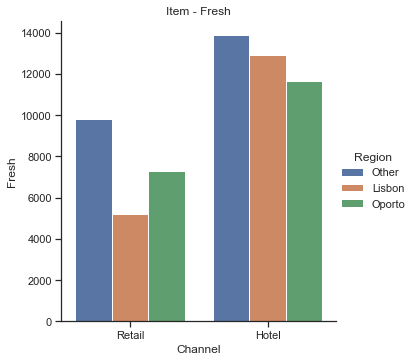

In [9]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Milk')

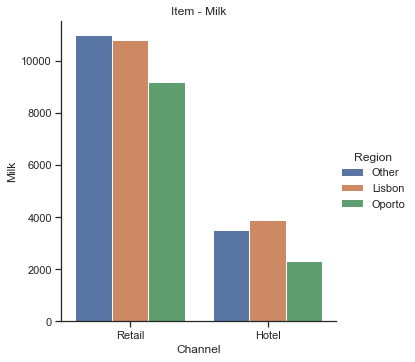

In [10]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Grocery')

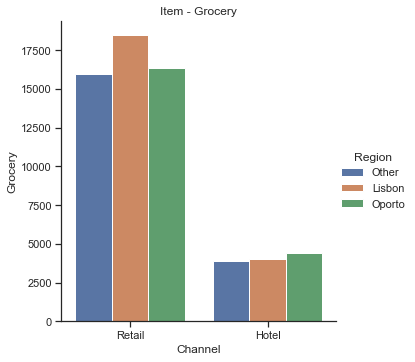

In [11]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

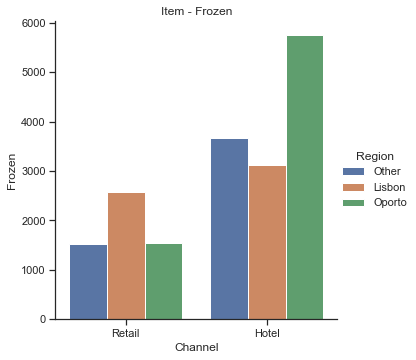

In [12]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

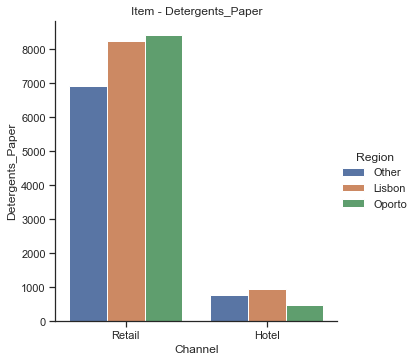

In [13]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Delicatessen')

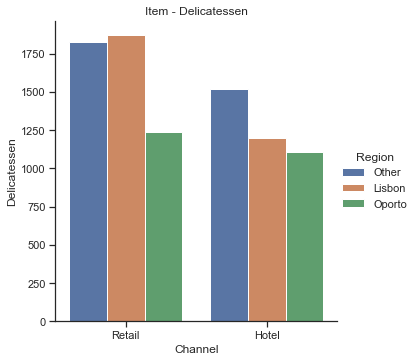

In [14]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=customer_spending_df)
plt.title('Item - Delicatessen')

#5)all varieties show similar behaviour across Region , "Grocery" spending highest via "Retail" channel
#6)all varieties show similar behaviour across Region , "Fresh" spending highest via "Hotel" channel

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [15]:
customer_spending_df.describe()


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [16]:
cv_fresh = np.std(customer_spending_df['Fresh']) / np.mean(customer_spending_df['Fresh'])
print(" coefficient of variation (CV) of Fresh is : ",cv_fresh)

 coefficient of variation (CV) of Fresh is :  1.0527196084948245


In [17]:
cv_milk = np.std(customer_spending_df['Milk']) / np.mean(customer_spending_df['Milk'])
print(" coefficient of variation (CV) of Milk is : ",cv_milk)

 coefficient of variation (CV) of Milk is :  1.2718508307424503


In [18]:
cv_Grocery = np.std(customer_spending_df['Grocery']) / np.mean(customer_spending_df['Grocery'])
print(" coefficient of variation (CV) of Grocery is : ",cv_Grocery)

 coefficient of variation (CV) of Grocery is :  1.193815447749267


In [19]:
cv_Frozen = np.std(customer_spending_df['Frozen']) / np.mean(customer_spending_df['Frozen'])
print(" coefficient of variation (CV) of Frozen is : ",cv_Frozen)

 coefficient of variation (CV) of Frozen is :  1.5785355298607762


In [20]:
cv_Detergents_Paper = np.std(customer_spending_df['Detergents_Paper']) / np.mean(customer_spending_df['Detergents_Paper'])
print(" coefficient of variation (CV) of Detergents_Paper is : ",cv_Detergents_Paper)

 coefficient of variation (CV) of Detergents_Paper is :  1.6527657881041729


In [21]:
cv_Delicatessen = np.std(customer_spending_df['Delicatessen']) / np.mean(customer_spending_df['Delicatessen'])
print(" coefficient of variation (CV) of Delicatessen is : ",cv_Delicatessen)

 coefficient of variation (CV) of Delicatessen is :  1.8473041039189306


In [22]:
print(" coefficient of variation (CV) of Fresh is : ",cv_fresh)
print(" coefficient of variation (CV) of Milk is : ",cv_milk)
print(" coefficient of variation (CV) of Grocery is : ",cv_Grocery)
print(" coefficient of variation (CV) of Frozen is : ",cv_Frozen)
print(" coefficient of variation (CV) of Detergents_Paper is : ",cv_Detergents_Paper)
print(" coefficient of variation (CV) of Delicatessen is : ",cv_Delicatessen)

#ANS: which item shows the most inconsistent behaviour for the item is: Fresh
#ANS: Which items show the least inconsistent behaviour for the item is: Delicatessen


 coefficient of variation (CV) of Fresh is :  1.0527196084948245
 coefficient of variation (CV) of Milk is :  1.2718508307424503
 coefficient of variation (CV) of Grocery is :  1.193815447749267
 coefficient of variation (CV) of Frozen is :  1.5785355298607762
 coefficient of variation (CV) of Detergents_Paper is :  1.6527657881041729
 coefficient of variation (CV) of Delicatessen is :  1.8473041039189306


# 1.4 Are there any outliers in the data?

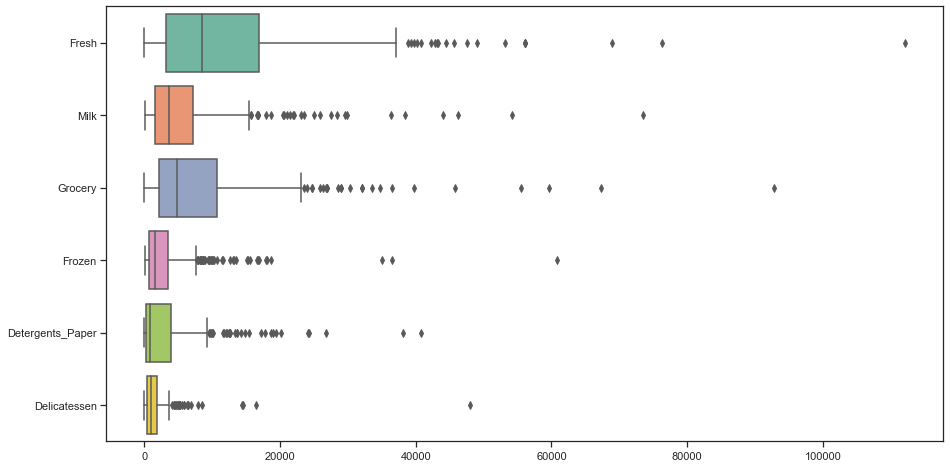

In [23]:
products = df[df.columns[+3:df.columns.size]]#products = Fresh, Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
products
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")
# all products (Fresh, Milk,Grocery,Frozen,Detergents_Paper,Delicatessen) has outliers consist

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [24]:
#Based on the provided data i have came up with couple of recommendeation,which can help solve our business problem
#the data is based on, in Portugal (Lisbon , Oporto, Other Region) product (Fresh, Milk,Grocery,Frozen,Detergents_Paper,Delicatessen) cosumption or spending by people
#1)Product (cosumption) spending is lowest in "Oporto" Region in Portugal 
#2)Product (cosumption) spending is highest in "Other" Region in Portugal 
#3)Product (cosumption) spending is lowest via "Retail" channel in Portugal 
#4)Product (cosumption) spending is highest via "Hotel" channel in Portugal 

#5)all varieties show similar behaviour across Region , Grocery spending highest via Retail channel
#6)all varieties show similar behaviour across Region , Fresh spending highest via Hotel channel

#7)the most inconsistent behaviour for the item is  : Fresh
#8)the least inconsistent behaviour for the item is : Delicatessen 




# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [25]:
mydata = pd.read_csv('Survey-1.csv') # read the data as a data frame

In [26]:
mydata.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [27]:
#2.1.1. Gender and Major
ct = pd.crosstab(mydata['Gender'],mydata['Major'])
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
#2.1.2. Gender and Grad Intention
ct = pd.crosstab(mydata['Gender'],mydata['Grad Intention'])
ct

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [29]:
#2.1.3.Gender and Employment
ct = pd.crosstab(mydata['Gender'],mydata['Employment'])
ct

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [30]:
#2.1.4. Gender and Computer
ct = pd.crosstab(mydata['Gender'],mydata['Computer'])
ct

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [31]:
#Gender and Employment
ct = pd.crosstab(mydata['Gender'],mydata['Employment'])
ct

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [32]:
#P (Male) = count of males/total count
#mydata.info()
total_male=(mydata['Gender'].value_counts()['Male'])
print("Total male count : ", total_male)

total = mydata['Gender'].count()
print("Total count : " ,total)

p_male = total_male/total
print("probability that a randomly selected CMSU student will be male :",p_male)



Total male count :  29
Total count :  62
probability that a randomly selected CMSU student will be male : 0.46774193548387094


In [33]:
#2.2.2. What is the probability that a randomly selected CMSU student will be female?
#P (FeMale) = count of males/total count
#mydata.info()

total_female=(mydata['Gender'].value_counts()['Female'])
print("Total female count : ", total_female)

total = mydata['Gender'].count()
print("Total count : " ,total)

p_female = total_female/total
print(" probability that a randomly selected CMSU student will be female :",p_female)



Total female count :  33
Total count :  62
 probability that a randomly selected CMSU student will be female : 0.532258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [34]:
# Gender and Major
ct = pd.crosstab(mydata['Gender'],mydata['Major'])
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [35]:
#2.3.1. Find the conditional probability of different majors among the male students in CMSU.

total_male=(mydata['Gender'].value_counts()['Male'])
print("Total male count : ", total_male)
print()


#calculate probabilty of total 'male' in 'Accounting' major

accounting_male=4
probabilty_male_accounting=accounting_male/total_male
print('calculate probabilty of total male in Accounting major is:',probabilty_male_accounting)
print()

#calculate probabilty of total 'male' in 'CIS' major
cis_male=1
probabilty_male_cis=cis_male/total_male
print('calculate probabilty of total male in CIS major is:',probabilty_male_cis)
print()

#calculate probabilty of total 'male' in 'Economics/Finance' major
Economics_Finance_male=4
probabilty_male_Economics_Finance=Economics_Finance_male/total_male
print('calculate probabilty of total male in Economics/Finance major is:',probabilty_male_Economics_Finance)
print()

#calculate probabilty of total 'male' in 'International Business' major
International_Business_male=2
probabilty_male_International_Business=International_Business_male/total_male
print('calculate probabilty of total male in International_Business major is:',probabilty_male_International_Business)
print()

#calculate probabilty of total 'male' in 'Management' major
Management_male=6
probabilty_male_Management=Management_male/total_male
print('calculate probabilty of total male in Management major is:',probabilty_male_Management)
print()

#calculate probabilty of total 'male' in 'Other' major
Other_male=4
probabilty_male_Other=Other_male/total_male
print('calculate probabilty of total male in Other major is:',probabilty_male_Other)
print()

#calculate probabilty of total 'male' in 'Retailing/Marketing' major
Retailing_Marketing_male=5
probabilty_male_Retailing_Marketing=Retailing_Marketing_male/total_male
print('calculate probabilty of total male in Retailing/Marketing major is:',probabilty_male_Retailing_Marketing)
print()

#calculate probabilty of total 'male' in 'Undecided' major
Undecided_male=3
probabilty_male_Undecided=Undecided_male/total_male
print('calculate probabilty of total male in Undecided major is:',probabilty_male_Undecided)
print()


Total male count :  29

calculate probabilty of total male in Accounting major is: 0.13793103448275862

calculate probabilty of total male in CIS major is: 0.034482758620689655

calculate probabilty of total male in Economics/Finance major is: 0.13793103448275862

calculate probabilty of total male in International_Business major is: 0.06896551724137931

calculate probabilty of total male in Management major is: 0.20689655172413793

calculate probabilty of total male in Other major is: 0.13793103448275862

calculate probabilty of total male in Retailing/Marketing major is: 0.1724137931034483

calculate probabilty of total male in Undecided major is: 0.10344827586206896



In [36]:
#2.3.2 Find the conditional probability of different majors among the female students of CMSU.

total_female=(mydata['Gender'].value_counts()['Female'])
print("Total female count : ", total_female)
print()

#calculate probabilty of total 'female' in 'Accounting' major

accounting_female=3
probabilty_female_accounting=accounting_female/total_female
print('calculate probabilty of total female in Accounting major is:',probabilty_female_accounting)
print()

#calculate probabilty of total 'female' in 'CIS' major
cis_female=3
probabilty_female_cis=cis_female/total_female
print('calculate probabilty of total female in CIS major is:',probabilty_female_cis)
print()

#calculate probabilty of total 'female' in 'Economics/Finance' major
Economics_Finance_female=7
probabilty_female_Economics_Finance=Economics_Finance_female/total_female
print('calculate probabilty of total female in Economics/Finance major is:',probabilty_female_Economics_Finance)
print()

#calculate probabilty of total 'female' in 'International Business' major
International_Business_female=4
probabilty_female_International_Business=International_Business_female/total_female
print('calculate probabilty of total female in International_Business major is:',probabilty_female_International_Business)
print()

#calculate probabilty of total 'female' in 'Management' major
Management_female=4
probabilty_female_Management=Management_female/total_female
print('calculate probabilty of total female in Management major is:',probabilty_female_Management)
print()

#calculate probabilty of total 'female' in 'Other' major
Other_female=3
probabilty_female_Other=Other_female/total_female
print('calculate probabilty of total female in Other major is:',probabilty_female_Other)
print()

#calculate probabilty of total 'female' in 'Retailing/Marketing' major
Retailing_Marketing_female=9
probabilty_female_Retailing_Marketing=Retailing_Marketing_female/total_female
print('calculate probabilty of total female in Retailing/Marketing major is:',probabilty_female_Retailing_Marketing)
print()

#calculate probabilty of total 'female' in 'Undecided' major
Undecided_female=0
probabilty_female_Undecided=Undecided_female/total_female
print('calculate probabilty of total female in Undecided major is:',probabilty_female_Undecided)
print()



Total female count :  33

calculate probabilty of total female in Accounting major is: 0.09090909090909091

calculate probabilty of total female in CIS major is: 0.09090909090909091

calculate probabilty of total female in Economics/Finance major is: 0.21212121212121213

calculate probabilty of total female in International_Business major is: 0.12121212121212122

calculate probabilty of total female in Management major is: 0.12121212121212122

calculate probabilty of total female in Other major is: 0.09090909090909091

calculate probabilty of total female in Retailing/Marketing major is: 0.2727272727272727

calculate probabilty of total female in Undecided major is: 0.0



# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [37]:
#Gender and Grad Intention
ct = pd.crosstab(mydata['Gender'],mydata['Grad Intention'])
ct

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [38]:
#2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
#total_student = mydata['Gender'].count()
#print("Total student count : " ,total_student)
total_male_student=29
print("total_male_student :",total_male_student)

Male_with_gard_intention=17
print("Male_with_gard_intention : ",Male_with_gard_intention)

Probability_male_intend_graduate=Male_with_gard_intention/total_male_student
print("probability That a randomly chosen student is a male and intends to graduate : ",Probability_male_intend_graduate)

total_male_student : 29
Male_with_gard_intention :  17
probability That a randomly chosen student is a male and intends to graduate :  0.5862068965517241


In [39]:
# Gender and Computer
ct1 = pd.crosstab(mydata['Gender'],mydata['Computer'])
ct1


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [40]:
#2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

Female_does_not_have_laptop=4
total_female=33
Probability_female_does_not_have_laptop=Female_does_not_have_laptop/total_female
print("Female_does_not_have_laptop : ",Female_does_not_have_laptop)
print("Total female : ",total_female)
print("probability that a randomly selected student is a female and does NOT have a laptop : ",Probability_female_does_not_have_laptop)




Female_does_not_have_laptop :  4
Total female :  33
probability that a randomly selected student is a female and does NOT have a laptop :  0.12121212121212122


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [41]:
#Gender and Employment
ct6 = pd.crosstab(mydata['Gender'],mydata['Employment'])
ct6


Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [42]:
#2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?
total_male=29
total_full_time_employment=10
both_total_male_and_total_full_time_employment=7
Probability_of_either_male_or_full_time_employment = ((29+10)-7)/62
print("Probability_of_either_male_or_full_time_employment : ",Probability_of_either_male_or_full_time_employment)


Probability_of_either_male_or_full_time_employment :  0.5161290322580645


In [43]:
#2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
#Gender and Major
ct7 = pd.crosstab(mydata['Gender'],mydata['Major'])
ct7


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [44]:
female_international_business_or_management=8
total_female=33
Probability_female_international_business_or_management=8/33
print("Probability_female_international_business_or_management :",Probability_female_international_business_or_management)

Probability_female_international_business_or_management : 0.24242424242424243


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [45]:
ct2 = pd.crosstab(mydata['Gender'],mydata['Grad Intention'])
ct2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [46]:
#The Undecided students are not considered now and the table is a 2x2 table
ct3=ct2.drop(columns=['Undecided'])
ct3

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [68]:
#Do you think the graduate intention and being female are independent events

total_female = 20/40
print("prbability of female :",total_female)
total_grad_yes=11/28
print("prbability of total_grad_yes :",total_grad_yes)

#P(F ).p(Yes)
prbability_of_independent_event=total_female*total_grad_yes
print("prbability_of_independent_event :",prbability_of_independent_event)

#P(F ∩ Yes)
ans=11/40
print("(F ∩ Yes) is ",ans)

#conclusion :Do you think the graduate intention and being female are independent events: NO




prbability of female : 0.5
prbability of total_grad_yes : 0.39285714285714285
prbability_of_independent_event : 0.19642857142857142
(F ∩ Yes) is  0.275


# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [48]:
#2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
mydata1=mydata['GPA']<3
print(mydata1)
vc=mydata1.value_counts()
print(vc)
probability_of_student_GPA_less_than_3=17/62
print("probability_of_student_GPA_less_than_3 :",probability_of_student_GPA_less_than_3)


0      True
1     False
2      True
3      True
4      True
      ...  
57     True
58     True
59     True
60    False
61    False
Name: GPA, Length: 62, dtype: bool
False    45
True     17
Name: GPA, dtype: int64
probability_of_student_GPA_less_than_3 : 0.27419354838709675


In [49]:
#2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. 
#Find the conditional probability that a randomly selected female earns 50 or more.

ct4 = pd.crosstab(mydata['Gender'],mydata['Salary'])
ct4


Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [50]:
rslt_df = mydata[(mydata['Gender'] == 'Male') & (mydata['Salary']>=50)] 
rslt_df
print(rslt_df.count())
probability_male_earn_50_or_more=14/29
print("probability_male_earn_50_or_more :",probability_male_earn_50_or_more)

ID                   14
Gender               14
Age                  14
Class                14
Major                14
Grad Intention       14
GPA                  14
Employment           14
Salary               14
Social Networking    14
Satisfaction         14
Spending             14
Computer             14
Text Messages        14
dtype: int64
probability_male_earn_50_or_more : 0.4827586206896552


In [51]:
rslt_df1 = mydata[(mydata['Gender'] == 'Female') & (mydata['Salary']>=50)] 
rslt_df1
print(rslt_df1.count())
probability_female_earn_50_or_more=18/33
print("probability_female_earn_50_or_more :",probability_female_earn_50_or_more)

ID                   18
Gender               18
Age                  18
Class                18
Major                18
Grad Intention       18
GPA                  18
Employment           18
Salary               18
Social Networking    18
Satisfaction         18
Spending             18
Computer             18
Text Messages        18
dtype: int64
probability_female_earn_50_or_more : 0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

 

In [52]:
#mydata.describe().round(2)
mydata5=mydata[['GPA','Salary','Spending','Text Messages']]
mydata5

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [53]:
mydata5.describe().round(2)

,GPA,Salary,Spending,Text Messages
count,62.00,62.00,62.00,62.00
mean,3.13,48.55,482.02,246.21
std,0.38,12.08,221.95,214.47
min,2.30,25.00,100.00,0.00
25%,2.90,40.00,312.50,100.00
50%,3.15,50.00,500.00,200.00
75%,3.40,55.00,600.00,300.00
max,3.90,80.00,1400.00,900.00


In [54]:
from scipy.stats import norm 
mean=3.13
SD=0.38
one_sd = norm.cdf(SD, mean, SD) - norm.cdf(-SD, mean, SD) 
two_sd = norm.cdf(2 * SD, mean, SD) - norm.cdf(-2 * SD, mean, SD) 
three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD) 
print("Fracton of values within one SD =", one_sd) 
print("Fracton of values within two SD =", two_sd) 
print("Fracton of values within three SD =", three_sd) 

Fracton of values within one SD = 2.29626127997821e-13
Fracton of values within two SD = 2.2324612147846955e-10
Fracton of values within three SD = 8.167365999808206e-08


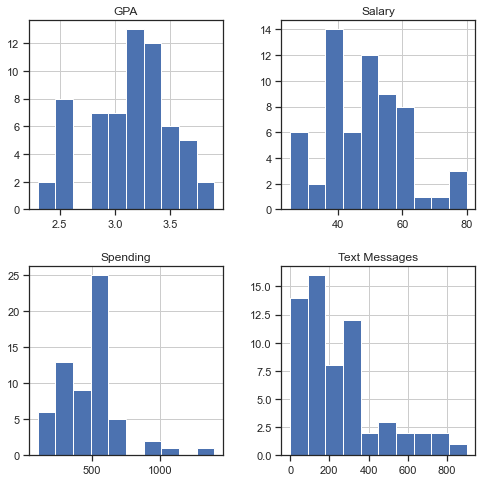

In [69]:
#median_column = mydata["GPA"]
#type(median_column)
#median_column.plot(kind="hist")
mydata5.iloc[:,0:4].hist(figsize=(8,8))
plt.show()

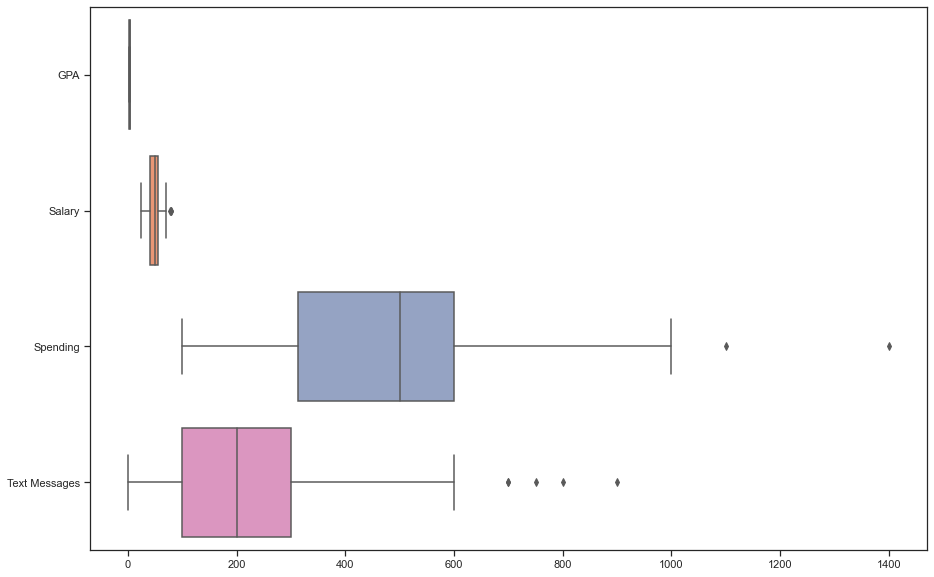

In [56]:
plt.figure(figsize=(15,10))
sns.boxplot(data=mydata5, orient="h", palette="Set2")

In [57]:
#Write a note summarizing your conclusions.
#after analysing histogram and boxplot
#I can conclude only GPA and Salary follow normal distribution
#Spending and Tex messages does not follow normal distribution because to many outliers present as per box plot


# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [58]:
new_df = pd.read_csv('A & B shingles-1.csv') # read the data as a data frame
new_df.head()


,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [59]:
t_statistic, p_value = ttest_1samp(new_df.A, 0.35)

print('One sample t test for column A')
print('t statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test for column A
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [60]:
#Since pvalue > 0.05, do not reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet.
#p-value = 0.0748. If the population mean moisture content is in fact no less than 0.35 pounds per 100 square feet, 
#the probability of observing a sample of 36 shingles that will result in a sample mean moisture content of 0.3167 pounds per 100 square feet or less is 0.0748.



In [61]:
t_statistic, p_value = ttest_1samp(new_df.B, 0.35,nan_policy='omit' )

print('One sample t test for coulmn B')
print('t statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test for coulmn B
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [62]:
#Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. 
#p-value = 0.0021. If the population mean moisture content is in fact no less than 0.35pounds per 100 square feet, 
#the probability of observing a sample of 31 shingles that will result in a sample mean moisture content of 0.2735 pounds per 100 square feet or less is 0.0021.

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?



In [63]:
#H0 : μ(A)= μ(B)  

#Ha : μ(A)!= μ(B)  

a = 0.05 

In [64]:
t_statistic,p_value=ttest_ind(new_df['A'],new_df['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic={} and p_value={}".format(round(t_statistic,3),round(p_value,3)))  



t_statistic=1.29 and p_value=0.202


In [65]:
#As the p_value > a , do not reject H0; and we can say that population mean for shingles A and B are equal Test Assumptions When running a two-sample t-test,
#the basic assumptions are that the distributions of the two populations are normal, 
#and that the variances of the two distributions are the same. If those assumptions are not likely to be met, 
#another testing procedure could be use.